In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#loading the training dataset
my_data=pd.read_csv('drive/MyDrive/Disease_train.csv')
my_data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,patient_id,diagnosis
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,1,0
1,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,2,0
2,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,3,0
3,0.388677,0.271349,0.828738,0.356753,0.280935,0.542696,0.140924,0.802197,0.074551,0.986887,7,0
4,0.772245,0.198716,0.005522,0.815461,0.706857,0.729007,0.771270,0.074045,0.358466,0.115869,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.348488,0.707966,0.250402,0.303423,0.243155,0.572161,0.226109,0.718364,0.680274,0.421270,4996,0
3996,0.025577,0.022651,0.532807,0.839199,0.598874,0.435650,0.882119,0.196995,0.359424,0.565309,4997,0
3997,0.291669,0.997712,0.452321,0.051722,0.176083,0.532481,0.550056,0.984144,0.599966,0.666627,4998,0
3998,0.213723,0.106865,0.602010,0.864880,0.587373,0.442783,0.578207,0.468772,0.141882,0.741184,4999,0


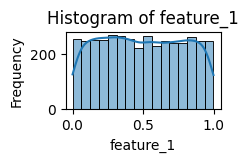

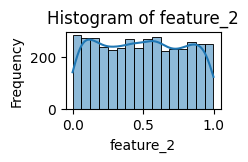

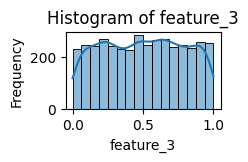

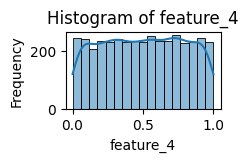

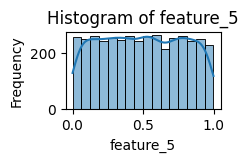

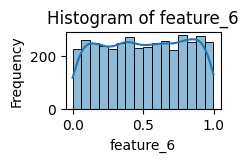

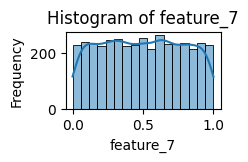

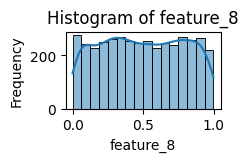

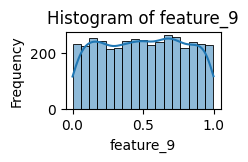

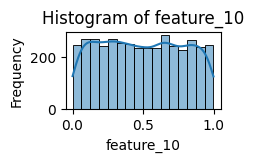

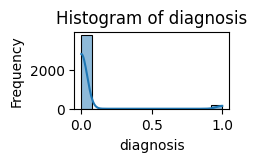

In [ ]:
import seaborn as sns

df = pd.DataFrame(my_data)

# Plot histograms for each column (excluding 'patient_id')
columns = df.columns.drop('patient_id')
for column in columns:
    plt.figure(figsize=(2, 1))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:

# Check for missing values
missing_values = my_data.isnull().sum()

# Print the number of missing values per column
print("Number of missing values per column:")
print(missing_values)

Number of missing values per column:
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
patient_id    0
diagnosis     0
dtype: int64


In [ ]:
 #Handle missing values appropriately
# Using SimpleImputer to fill missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

#printing the values before and after the imputation proess
print("Original X:")
print(X.head())
print("\nImputed X:")
print(X_imputed.head())


Original X:
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  -0.420635   1.577142   0.797872   0.334683  -1.179972  -1.213502   
1  -1.645749   1.643003   1.148657  -1.004610  -1.090226  -1.118945   
2   0.400754  -1.206180  -0.738158  -0.470643  -0.136492   0.957020   
3  -0.371703  -0.753780   1.135718  -0.503954  -0.745556   0.120524   
4   0.955903  -1.002988  -1.739093   1.086296   0.735664   0.763252   

   feature_7  feature_8  feature_9  feature_10  f_1_2_ratio  f_2_3_ratio  \
0  -1.532123   1.278353   0.349076    0.736518    -0.032702    -0.018752   
1  -0.674661   0.095826  -0.240894   -0.703621    -0.033803    -0.018881   
2  -1.038912   0.059382   0.318733   -1.549299    -0.020903    -0.019541   
3  -1.243558   1.056757  -1.487285    1.699784    -0.029633    -0.019685   
4   0.952169  -1.465241  -0.497149   -1.309466    -0.022381     0.014546   

   f_3_4_ratio  f_4_5_ratio  f_5_6_ratio  f_6_7_ratio  f_7_8_ratio  \
0    -0.083561    -0.017812    -0.

In [ ]:
#feature engineering
#here we are creating new columns with example of sum, meand and standard
for i in range(1, 9):
    j = i + 1
    new_col = f'f_{i}_{j}_ratio'
    my_data[new_col] = my_data[f'feature_{i}'] / my_data[f'feature_{j}']


In [ ]:
my_data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,patient_id,diagnosis,f_1_2_ratio,f_2_3_ratio,f_3_4_ratio,f_4_5_ratio,f_5_6_ratio,f_6_7_ratio,f_7_8_ratio,f_8_9_ratio
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,1,0,0.393957,1.298801,1.222724,3.837096,1.000155,2.685689,0.067058,1.440949
1,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,2,0,0.021223,1.165137,3.920345,1.167822,0.991388,0.602824,0.579778,1.214869
2,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,3,0,4.386235,0.477482,0.797421,0.803302,0.580851,3.932294,0.388293,0.868031
3,0.388677,0.271349,0.828738,0.356753,0.280935,0.542696,0.140924,0.802197,0.074551,0.986887,7,0,1.432389,0.327425,2.322999,1.269881,0.517665,3.850978,0.175673,10.760430
4,0.772245,0.198716,0.005522,0.815461,0.706857,0.729007,0.771270,0.074045,0.358466,0.115869,8,0,3.886179,35.985416,0.006772,1.153644,0.969616,0.945203,10.416287,0.206560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.348488,0.707966,0.250402,0.303423,0.243155,0.572161,0.226109,0.718364,0.680274,0.421270,4996,0,0.492239,2.827316,0.825257,1.247857,0.424977,2.530469,0.314755,1.055992
3996,0.025577,0.022651,0.532807,0.839199,0.598874,0.435650,0.882119,0.196995,0.359424,0.565309,4997,0,1.129172,0.042513,0.634899,1.401295,1.374666,0.493868,4.477864,0.548086
3997,0.291669,0.997712,0.452321,0.051722,0.176083,0.532481,0.550056,0.984144,0.599966,0.666627,4998,0,0.292338,2.205762,8.745195,0.293737,0.330685,0.968048,0.558918,1.640332
3998,0.213723,0.106865,0.602010,0.864880,0.587373,0.442783,0.578207,0.468772,0.141882,0.741184,4999,0,1.999935,0.177513,0.696062,1.472455,1.326547,0.765787,1.233451,3.303964


In [ ]:
from sklearn.preprocessing import StandardScaler

# for performing feature scaling we can follow the procedure
data = my_data.drop(['patient_id', 'diagnosis'],axis=1)
scaler= StandardScaler()
scaled_data = scaler.fit_transform(data)
data_scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
my_data[data.columns] = data_scaled_df

In [ ]:
my_data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,patient_id,diagnosis,f_1_2_ratio,f_2_3_ratio,f_3_4_ratio,f_4_5_ratio,f_5_6_ratio,f_6_7_ratio,f_7_8_ratio,f_8_9_ratio
0,-0.420635,1.577142,0.797872,0.334683,-1.179972,-1.213502,-1.532123,1.278353,0.349076,0.736518,1,0,-0.032702,-0.018752,-0.083561,-0.017812,-0.033222,-0.016342,-0.033476,-0.042313
1,-1.645749,1.643003,1.148657,-1.004610,-1.090226,-1.118945,-0.674661,0.095826,-0.240894,-0.703621,2,0,-0.033803,-0.018881,-0.025444,-0.062135,-0.033257,-0.017098,-0.031201,-0.044506
2,0.400754,-1.206180,-0.738158,-0.470643,-0.136492,0.957020,-1.038912,0.059382,0.318733,-1.549299,3,0,-0.020903,-0.019541,-0.092723,-0.068188,-0.034892,-0.015889,-0.032051,-0.047871
3,-0.371703,-0.753780,1.135718,-0.503954,-0.745556,0.120524,-1.243558,1.056757,-1.487285,1.699784,7,0,-0.029633,-0.019685,-0.059857,-0.060440,-0.035144,-0.015919,-0.032994,0.048102
4,0.955903,-1.002988,-1.739093,1.086296,0.735664,0.763252,0.952169,-1.465241,-0.497149,-1.309466,8,0,-0.022381,0.014546,-0.109757,-0.062370,-0.033343,-0.016973,0.012451,-0.054289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.510806,0.744265,-0.883930,-0.688840,-0.876940,0.222170,-0.946830,0.766397,0.625138,-0.254348,4996,0,-0.032411,-0.017285,-0.092123,-0.060806,-0.035513,-0.016398,-0.032377,-0.046048
3996,-1.628468,-1.607070,0.102277,1.168589,0.360132,-0.248758,1.338295,-1.039393,-0.493806,0.243290,4997,0,-0.030529,-0.019958,-0.096224,-0.058258,-0.031730,-0.017137,-0.013902,-0.050975
3997,-0.707467,1.738395,-0.178794,-1.561437,-1.110193,0.085284,0.181599,1.686942,0.345070,0.593330,4998,0,-0.033002,-0.017882,0.078500,-0.076649,-0.035889,-0.016965,-0.031294,-0.040379
3998,-0.977257,-1.318131,0.343946,1.257621,0.320137,-0.224151,0.279657,-0.098081,-1.252473,0.850915,4999,0,-0.027956,-0.019829,-0.094907,-0.057077,-0.031921,-0.017039,-0.028300,-0.024238


In [ ]:
#splitting the trainning set for model training

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

x_train,x_valid,y_train,y_valid = train_test_split(my_data.drop(['patient_id','diagnosis'],axis=1),my_data['diagnosis'],test_size=0.2,random_state=40)



In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10,20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#randone used for naming random forest
randone = RandomForestClassifier(random_state=40)
grid_search = GridSearchCV(estimator=randone, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

# Evaluate on validation set
val_y_pred = grid_search.predict_proba(x_valid)[:, 1]
roc = roc_auc_score(y_valid, val_y_pred)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best ROC-AUC Score: 0.9521875


In [ ]:
if 'patient_id' in my_data.columns:
  my_data = my_data.drop(['patient_id'],axis=1)

X = my_data.drop(['diagnosis'],axis=1)
y = my_data['diagnosis']


In [ ]:
smoting = SMOTE(random_state=40)
X_resample, y_resample = smoting.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.2,random_state=40)



In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = grid_search.best_params_['n_estimators']

rfc = RandomForestClassifier(random_state=40, class_weight='balanced',
                                   n_estimators=n_estimators, max_depth=20,
                                   min_samples_leaf=2,
                                   min_samples_split=grid_search.best_params_['min_samples_split'])

rfc.fit(x_train, y_train)

# Predict class labels for the test set
y_test_pred = rfc.predict(x_test)

# Compute ROC-AUC score on the test set (if needed)
roc_test = roc_auc_score(y_test, y_test_pred)
print(f'ROC on test : {roc_test}')


ROC on test : 0.9534859377297934


**PREDICTION**

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Disease_test.csv')

test_data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,patient_id
0,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152,4
1,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,5
2,0.969585,0.775133,0.939499,0.894827,0.597900,0.921874,0.088493,0.195983,0.045227,0.325330,6
3,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891,10
4,0.289751,0.161221,0.929698,0.808120,0.633404,0.871461,0.803672,0.186570,0.892559,0.539342,12
...,...,...,...,...,...,...,...,...,...,...,...
995,0.426686,0.096690,0.806029,0.191078,0.458038,0.702638,0.932214,0.062726,0.393234,0.614648,4953
996,0.199872,0.082668,0.022176,0.764592,0.485057,0.843403,0.360837,0.703446,0.488521,0.612070,4959
997,0.595482,0.538485,0.042748,0.681312,0.358199,0.935674,0.186790,0.302116,0.504855,0.477355,4986
998,0.393314,0.128727,0.003647,0.743758,0.186244,0.051194,0.497209,0.346698,0.691807,0.107364,4993


In [ ]:

for i in range(1, 9):
    j = i + 1
    new_col = f'f_{i}_{j}_ratio'
    test_data[new_col] = test_data[f'feature_{i}'] / test_data[f'feature_{j}']



In [ ]:
test_data_new = test_data.drop(columns=['patient_id'],axis=1)

test_data_new

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,f_1_2_ratio,f_2_3_ratio,f_3_4_ratio,f_4_5_ratio,f_5_6_ratio,f_6_7_ratio,f_7_8_ratio,f_8_9_ratio
0,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152,3.562809,2.621367,0.068556,0.982657,1.194502,2.653844,3.118738,0.142747
1,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,0.246454,14.399483,0.037818,3.513875,0.390598,2.125437,0.599366,0.951268
2,0.969585,0.775133,0.939499,0.894827,0.597900,0.921874,0.088493,0.195983,0.045227,0.325330,1.250863,0.825049,1.049922,1.496617,0.648570,10.417541,0.451532,4.333288
3,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891,0.167676,0.937512,1.355453,0.728017,1.561308,0.944642,1.222650,16.819658
4,0.289751,0.161221,0.929698,0.808120,0.633404,0.871461,0.803672,0.186570,0.892559,0.539342,1.797228,0.173413,1.150445,1.275838,0.726830,1.084348,4.307615,0.209028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.426686,0.096690,0.806029,0.191078,0.458038,0.702638,0.932214,0.062726,0.393234,0.614648,4.412906,0.119959,4.218324,0.417166,0.651884,0.753731,14.861658,0.159514
996,0.199872,0.082668,0.022176,0.764592,0.485057,0.843403,0.360837,0.703446,0.488521,0.612070,2.417774,3.727762,0.029004,1.576292,0.575119,2.337351,0.512956,1.439952
997,0.595482,0.538485,0.042748,0.681312,0.358199,0.935674,0.186790,0.302116,0.504855,0.477355,1.105848,12.596667,0.062744,1.902047,0.382825,5.009227,0.618273,0.598421
998,0.393314,0.128727,0.003647,0.743758,0.186244,0.051194,0.497209,0.346698,0.691807,0.107364,3.055408,35.295974,0.004904,3.993456,3.638032,0.102962,1.434127,0.501149


In [ ]:
X_test_scaled = scaler.transform(test_data_new)
X_scaled_data = pd.DataFrame(X_test_scaled, columns=test_data_new.columns)

prediction_of_data = rfc.predict(X_scaled_data)
prediction_of_data



array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
test_data['predictions'] = prediction_of_data

prediction_file = pd.DataFrame({'patient_id': test_data['patient_id'], 'prediction': prediction_of_data})
prediction_file.head(10)

prediction_file.to_csv('SE22UCSE015_predictions.csv', index=False)



In [ ]:

df = pd.read_csv('SE22UCSE015_predictions.csv')

# checking ones
ones_count = (df == 1).sum().sum()

print(f'Number of ones in the CSV file: {ones_count}')


Number of ones in the CSV file: 85
